In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 500

In [84]:
df = pd.read_csv('../Downloads/chapter_1_cleaned_data.csv')

In [85]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [86]:
df['default payment next month'].mean()

0.2217971797179718

In [87]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [88]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [89]:

from sklearn.linear_model import LogisticRegression

In [90]:

my_lr = LogisticRegression()

In [91]:
my_lr

LogisticRegression()

In [92]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [94]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [95]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [96]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [98]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [99]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [101]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [102]:
type(X)


numpy.ndarray

In [103]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

In [104]:
mpl.rcParams['figure.dpi'] = 500

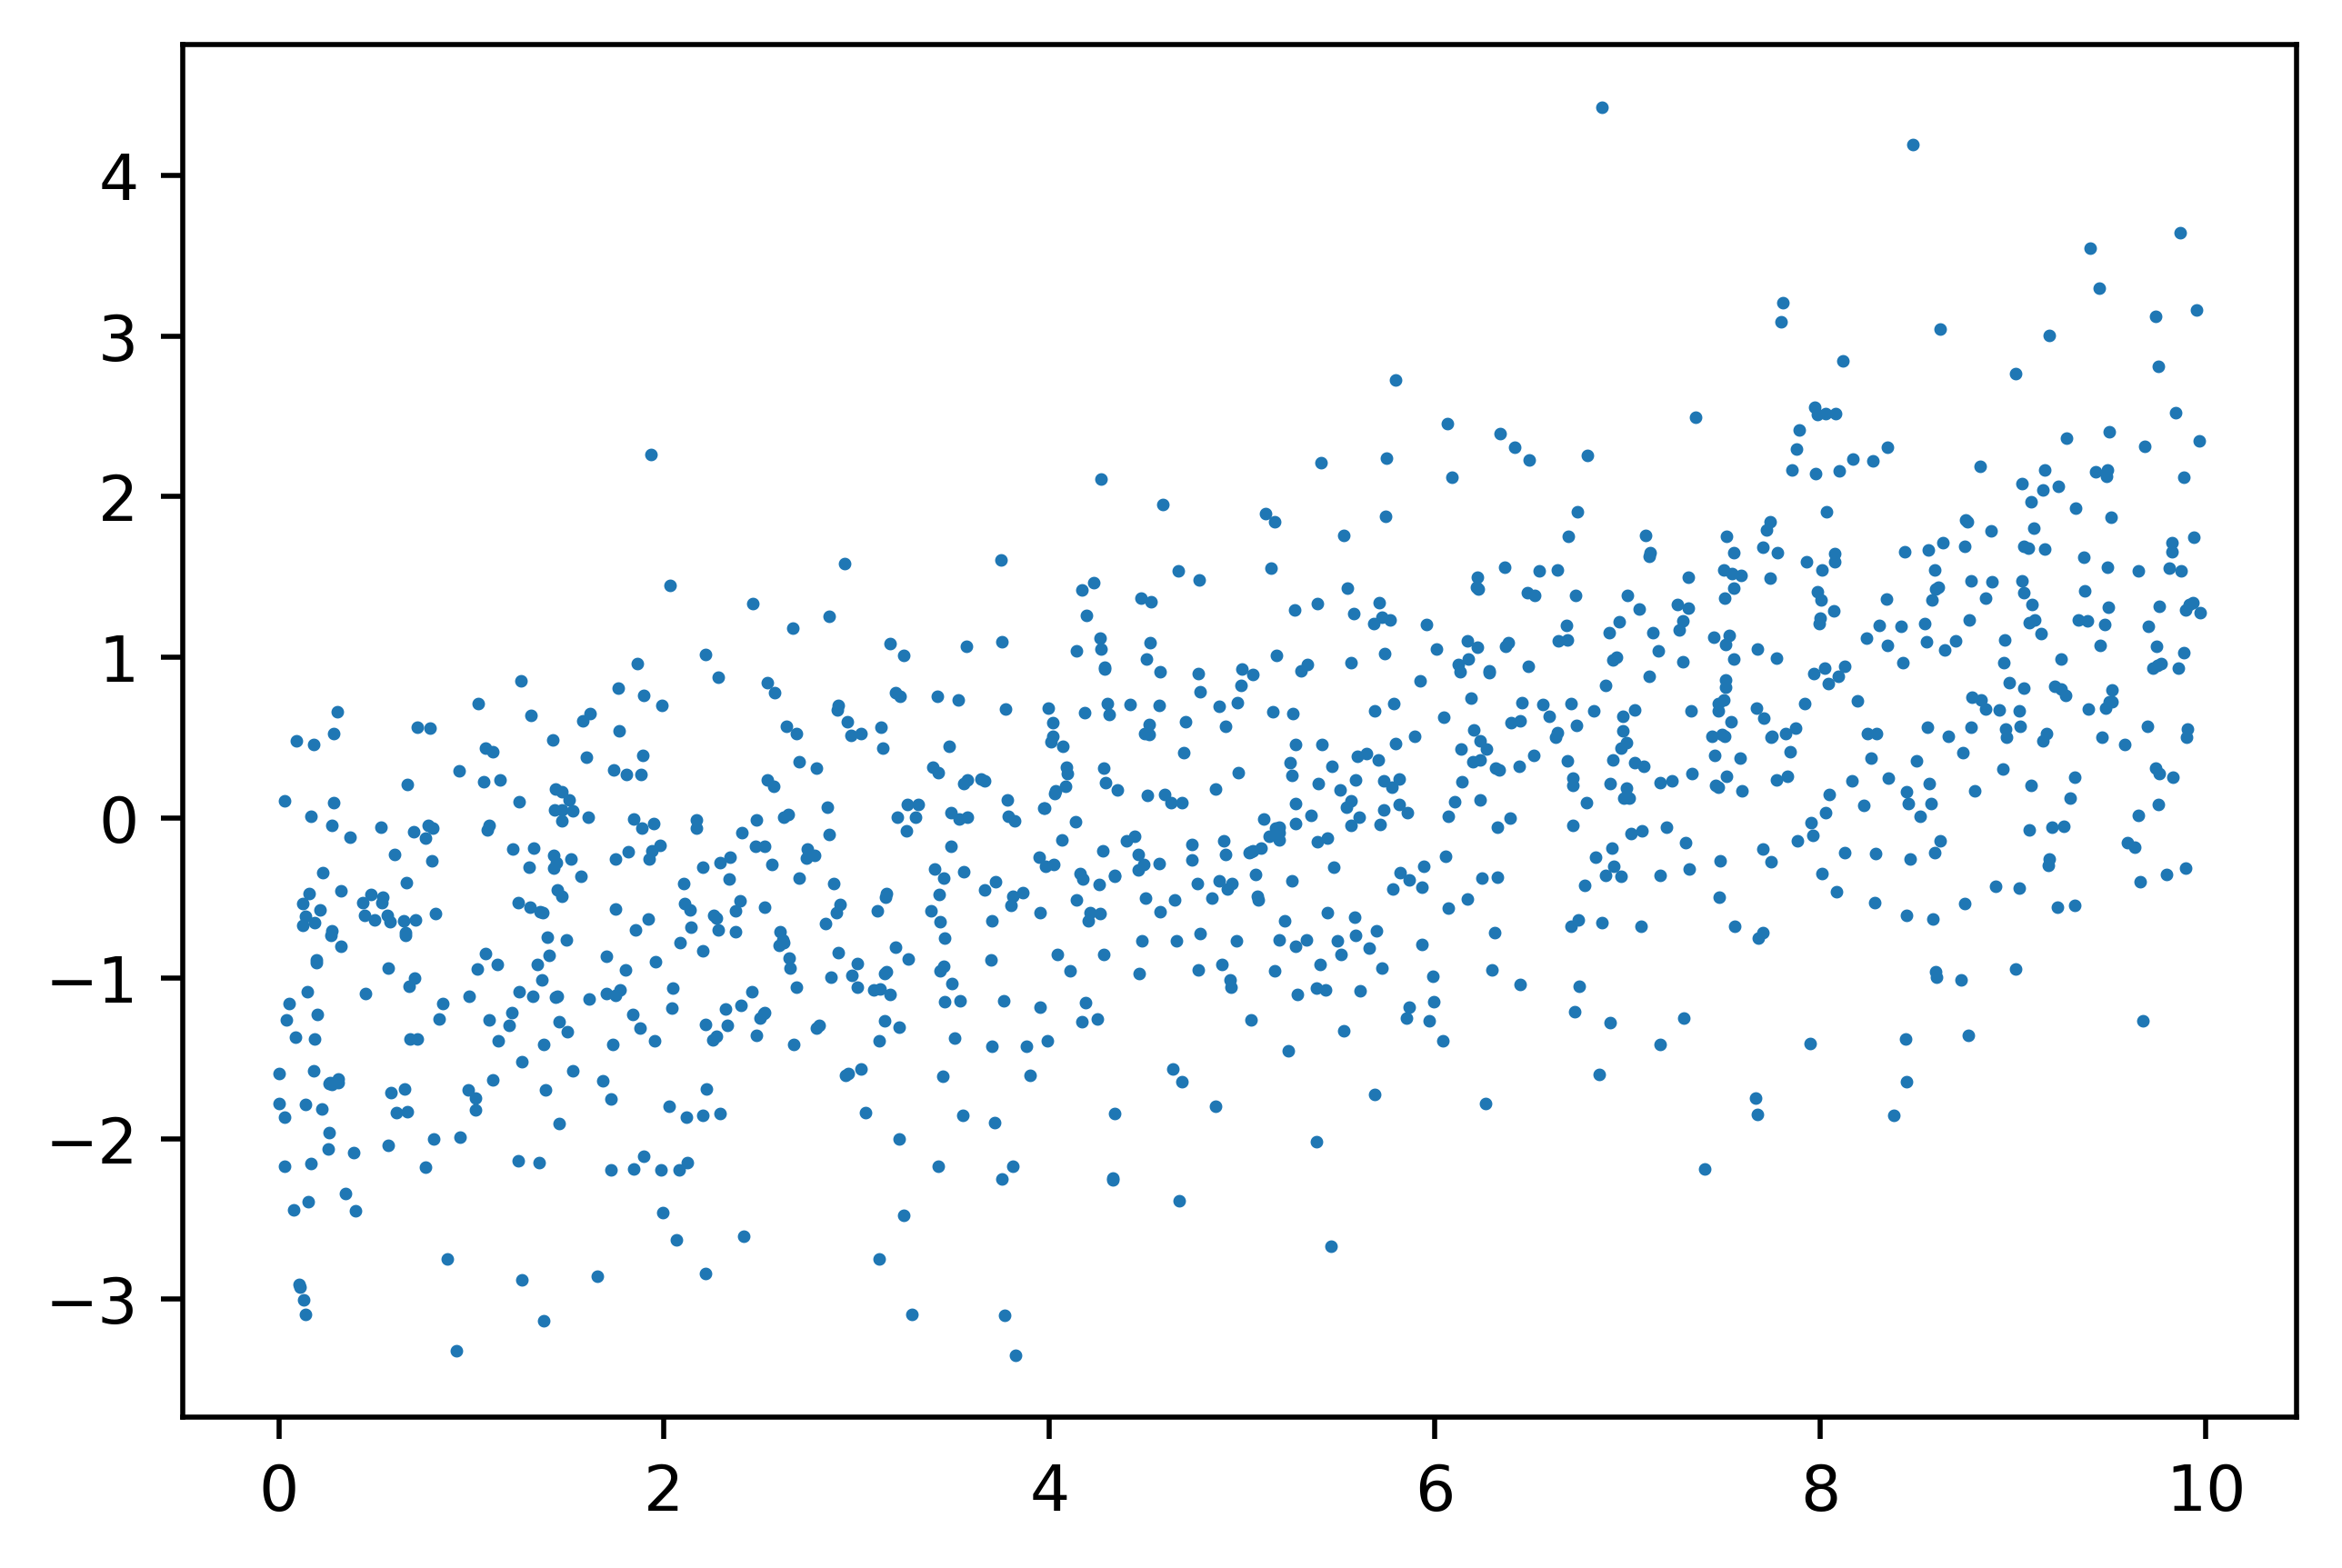

In [105]:
plt.scatter(X,y,s=1)


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lin_reg = LinearRegression()

In [108]:
lin_reg


LinearRegression()

In [109]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [110]:
print(lin_reg.intercept_)
print(lin_reg.coef_)


-1.1612566002825888
[0.24002588]


In [111]:
y_pred = lin_reg.predict(X.reshape(-1,1))

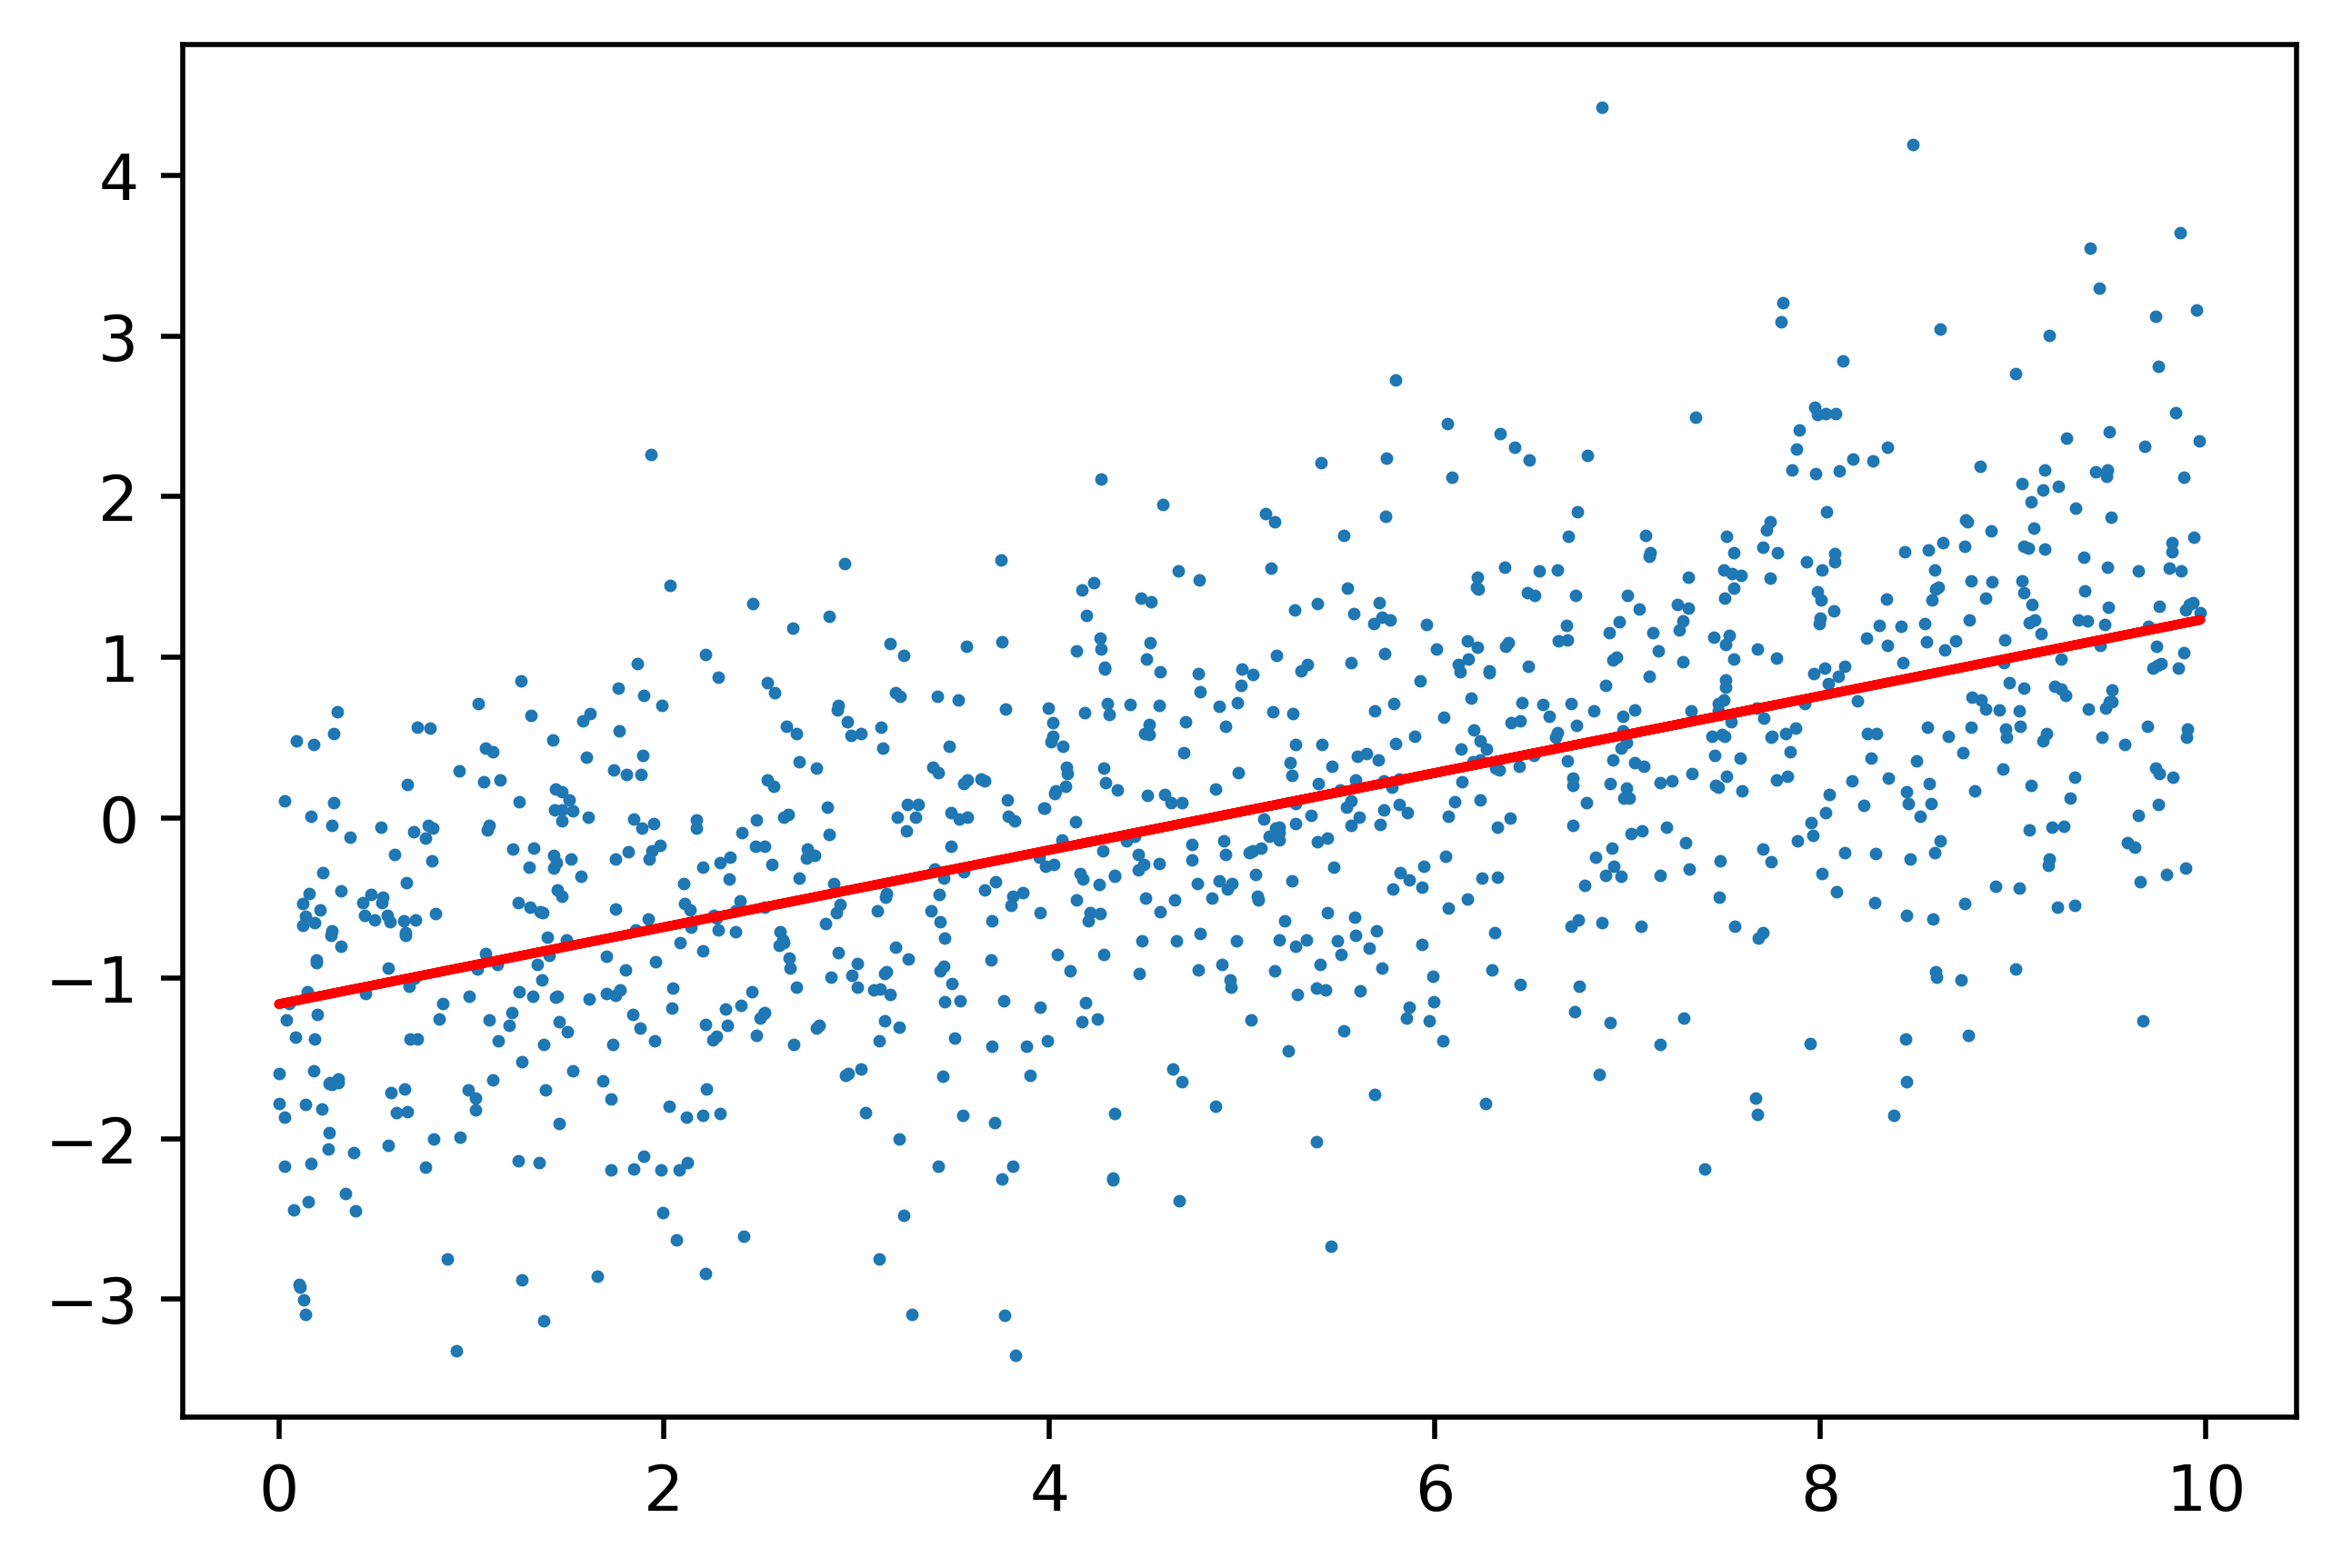

In [112]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [116]:
np.mean(y_train)

0.223102526838873

In [117]:
np.mean(y_test)

0.21657603600225014

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:

example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [120]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [121]:
y_pred = example_lr.predict(X_test)

In [122]:
is_correct = y_pred == y_test

In [123]:
np.mean(is_correct)


0.7834239639977498

In [124]:
example_lr.score(X_test, y_test)


0.7834239639977498

In [125]:
from sklearn import metrics


In [126]:
metrics.accuracy_score(y_test, y_pred)


0.7834239639977498

### Exercício 9

In [129]:
P = sum(y_test)
P

1155

In [130]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [131]:
TPR = TP/P
TPR

0.0

In [132]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [133]:
FNR = FN/P
FNR

1.0

In [134]:
N = sum(y_test==0)
N

4178

In [135]:
TN = sum( (y_test==0) & (y_pred==0))
TN

4178

In [136]:
FP = sum( (y_test==0) & (y_pred==1))
FP

0

In [137]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [138]:

metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

### Exercício 10

In [139]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [140]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [141]:
prob_sum.shape

(5333,)

In [142]:
np.unique(prob_sum)

array([1.])

In [143]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

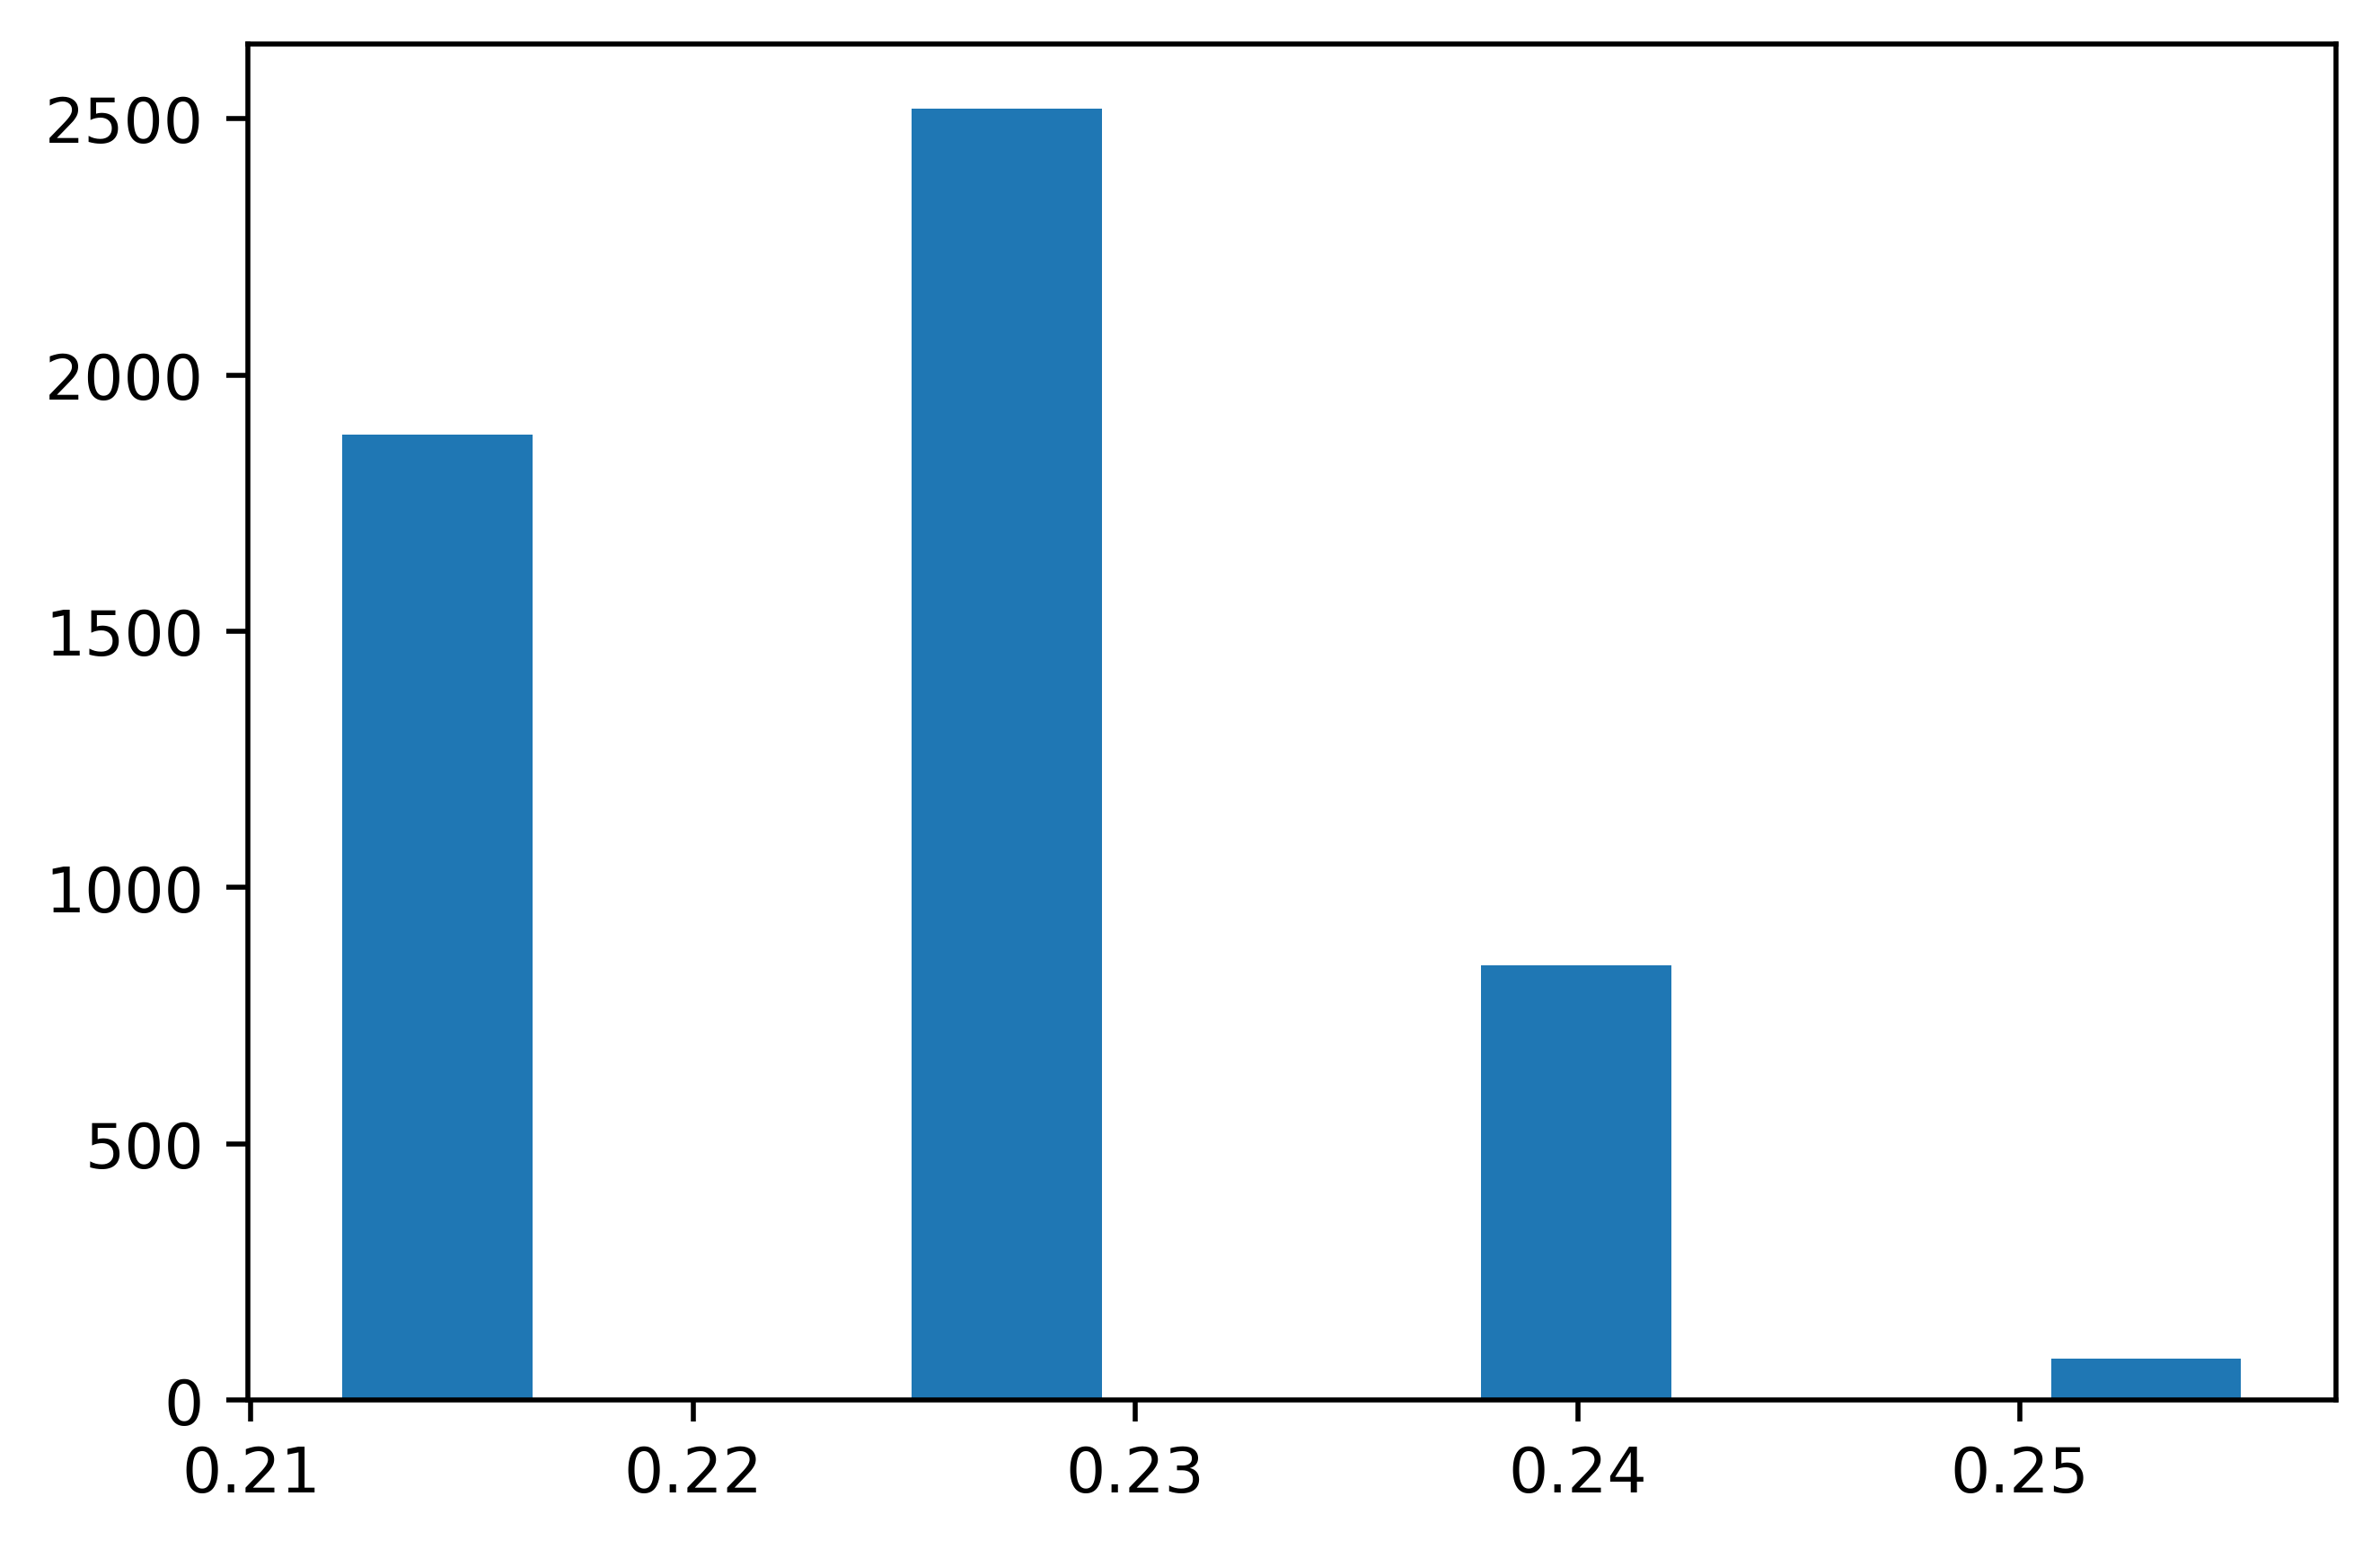

In [144]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

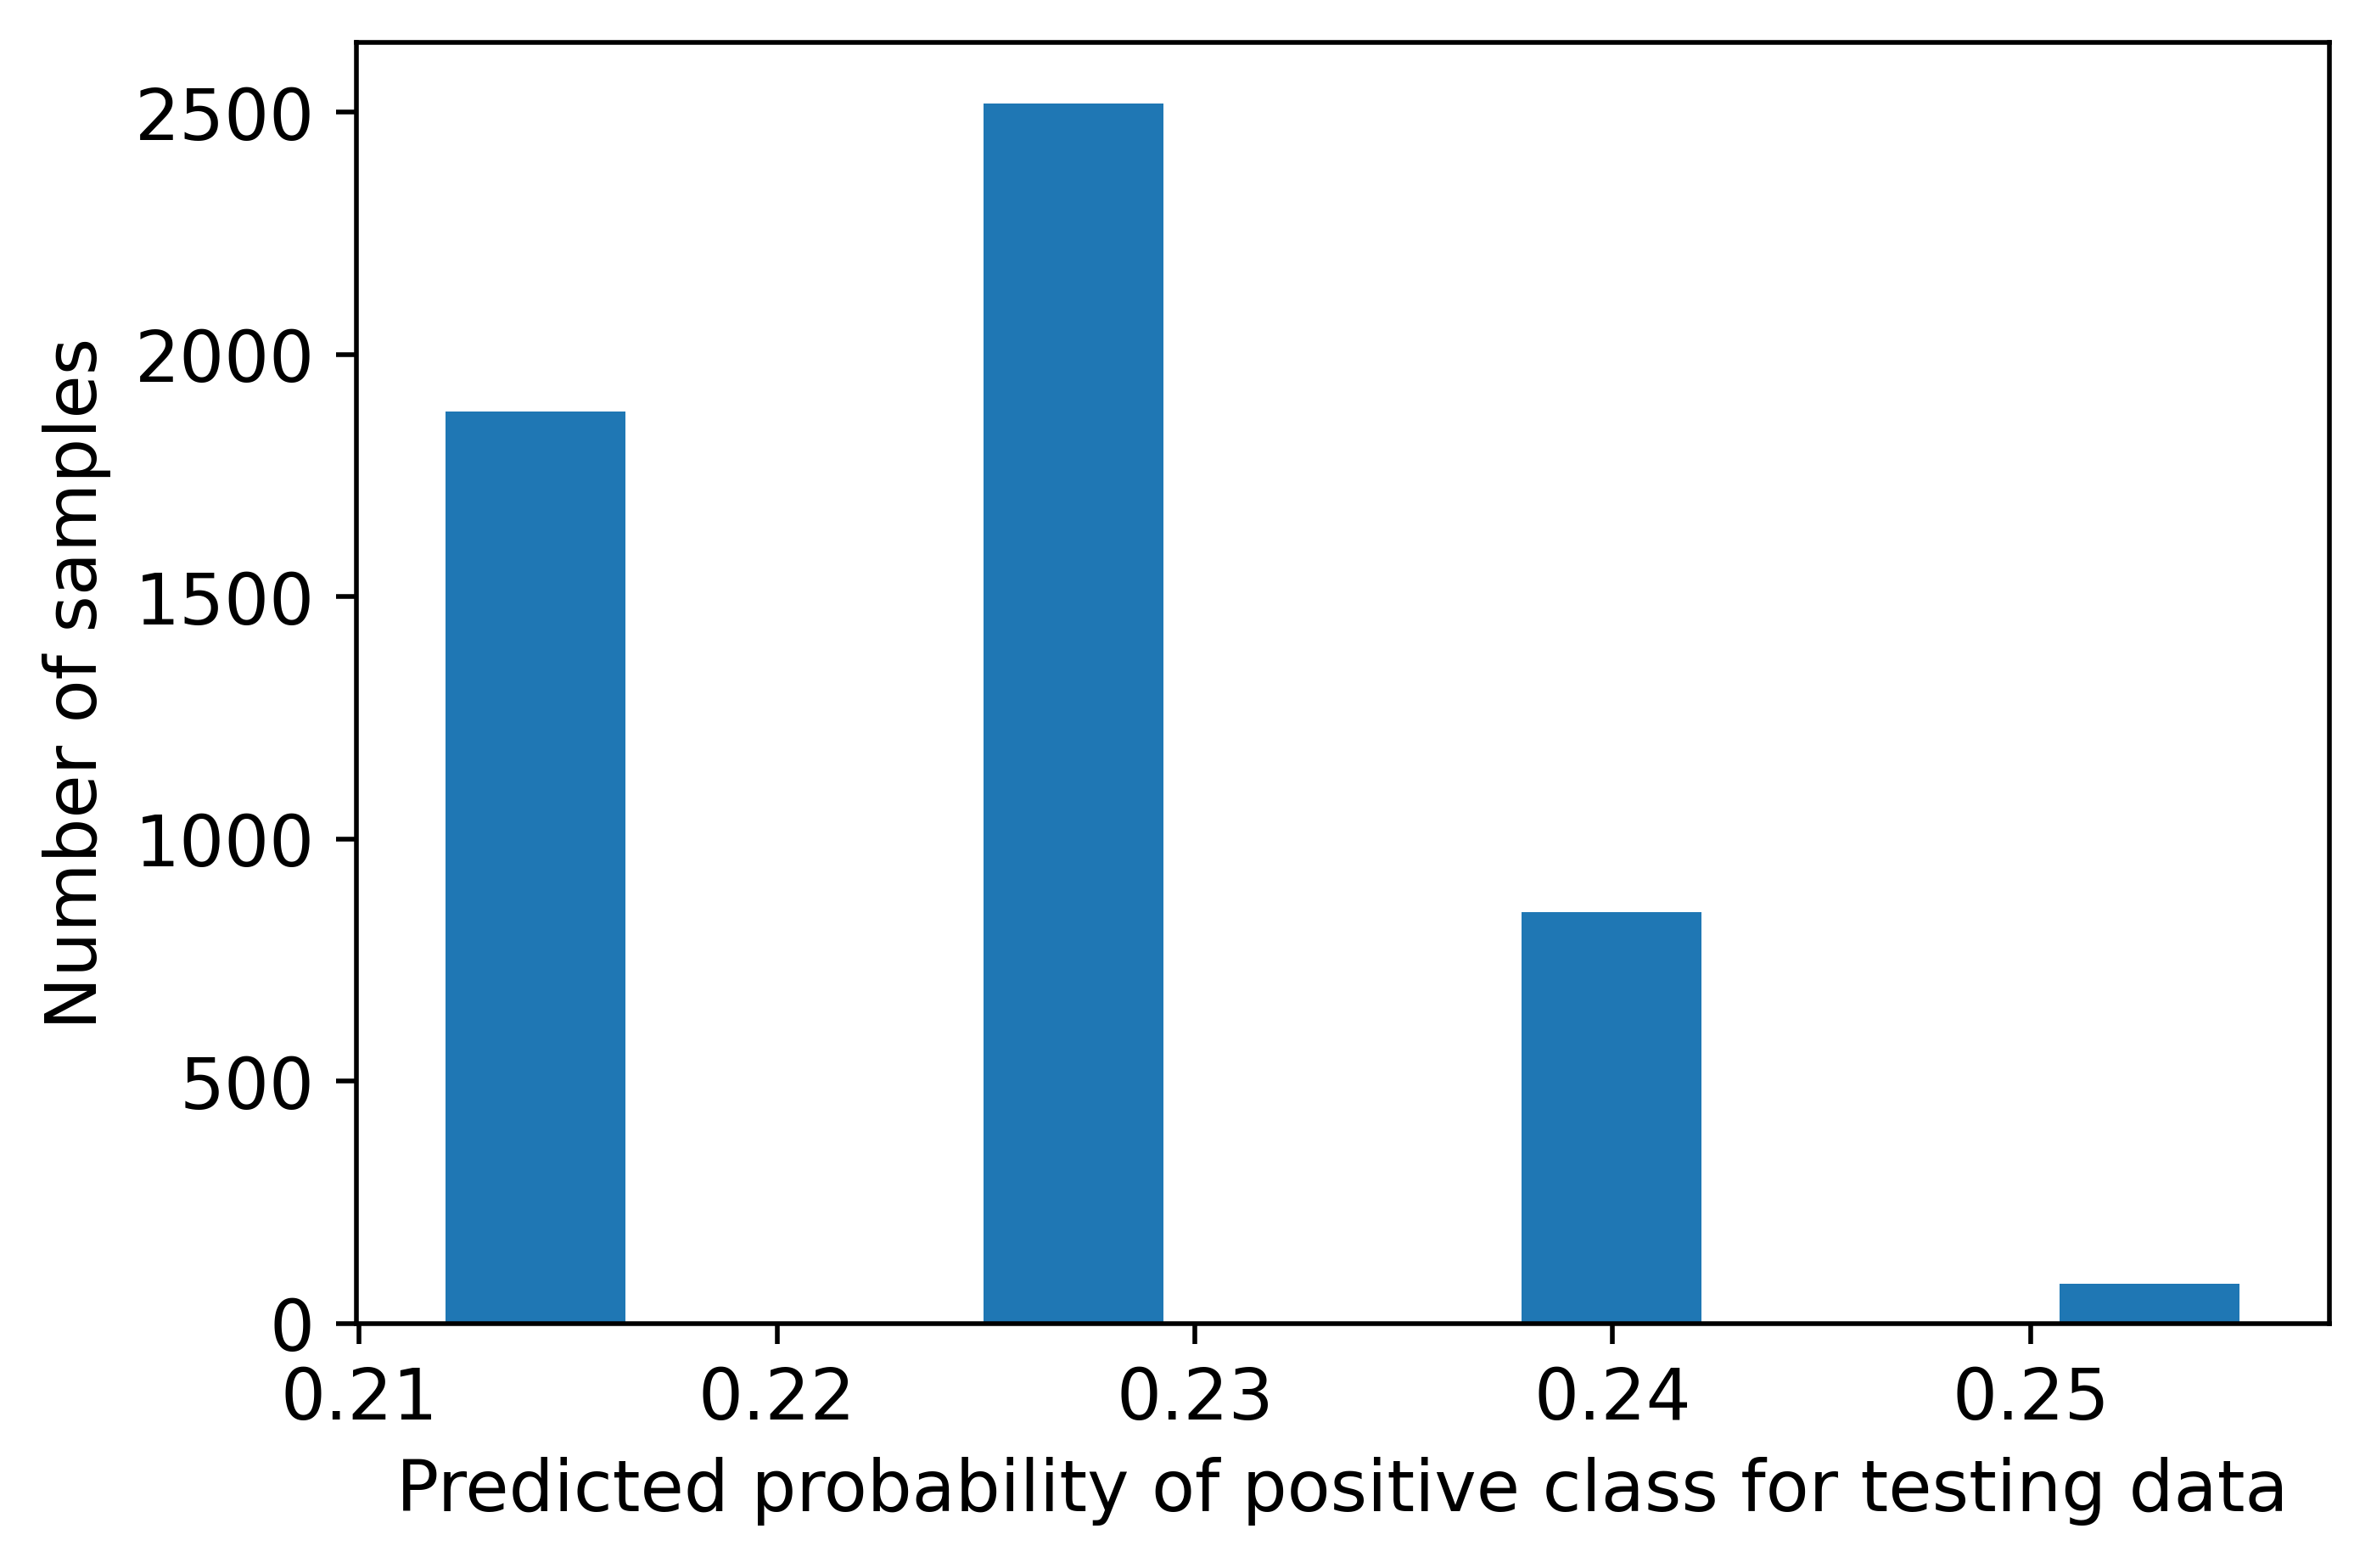

In [145]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [146]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

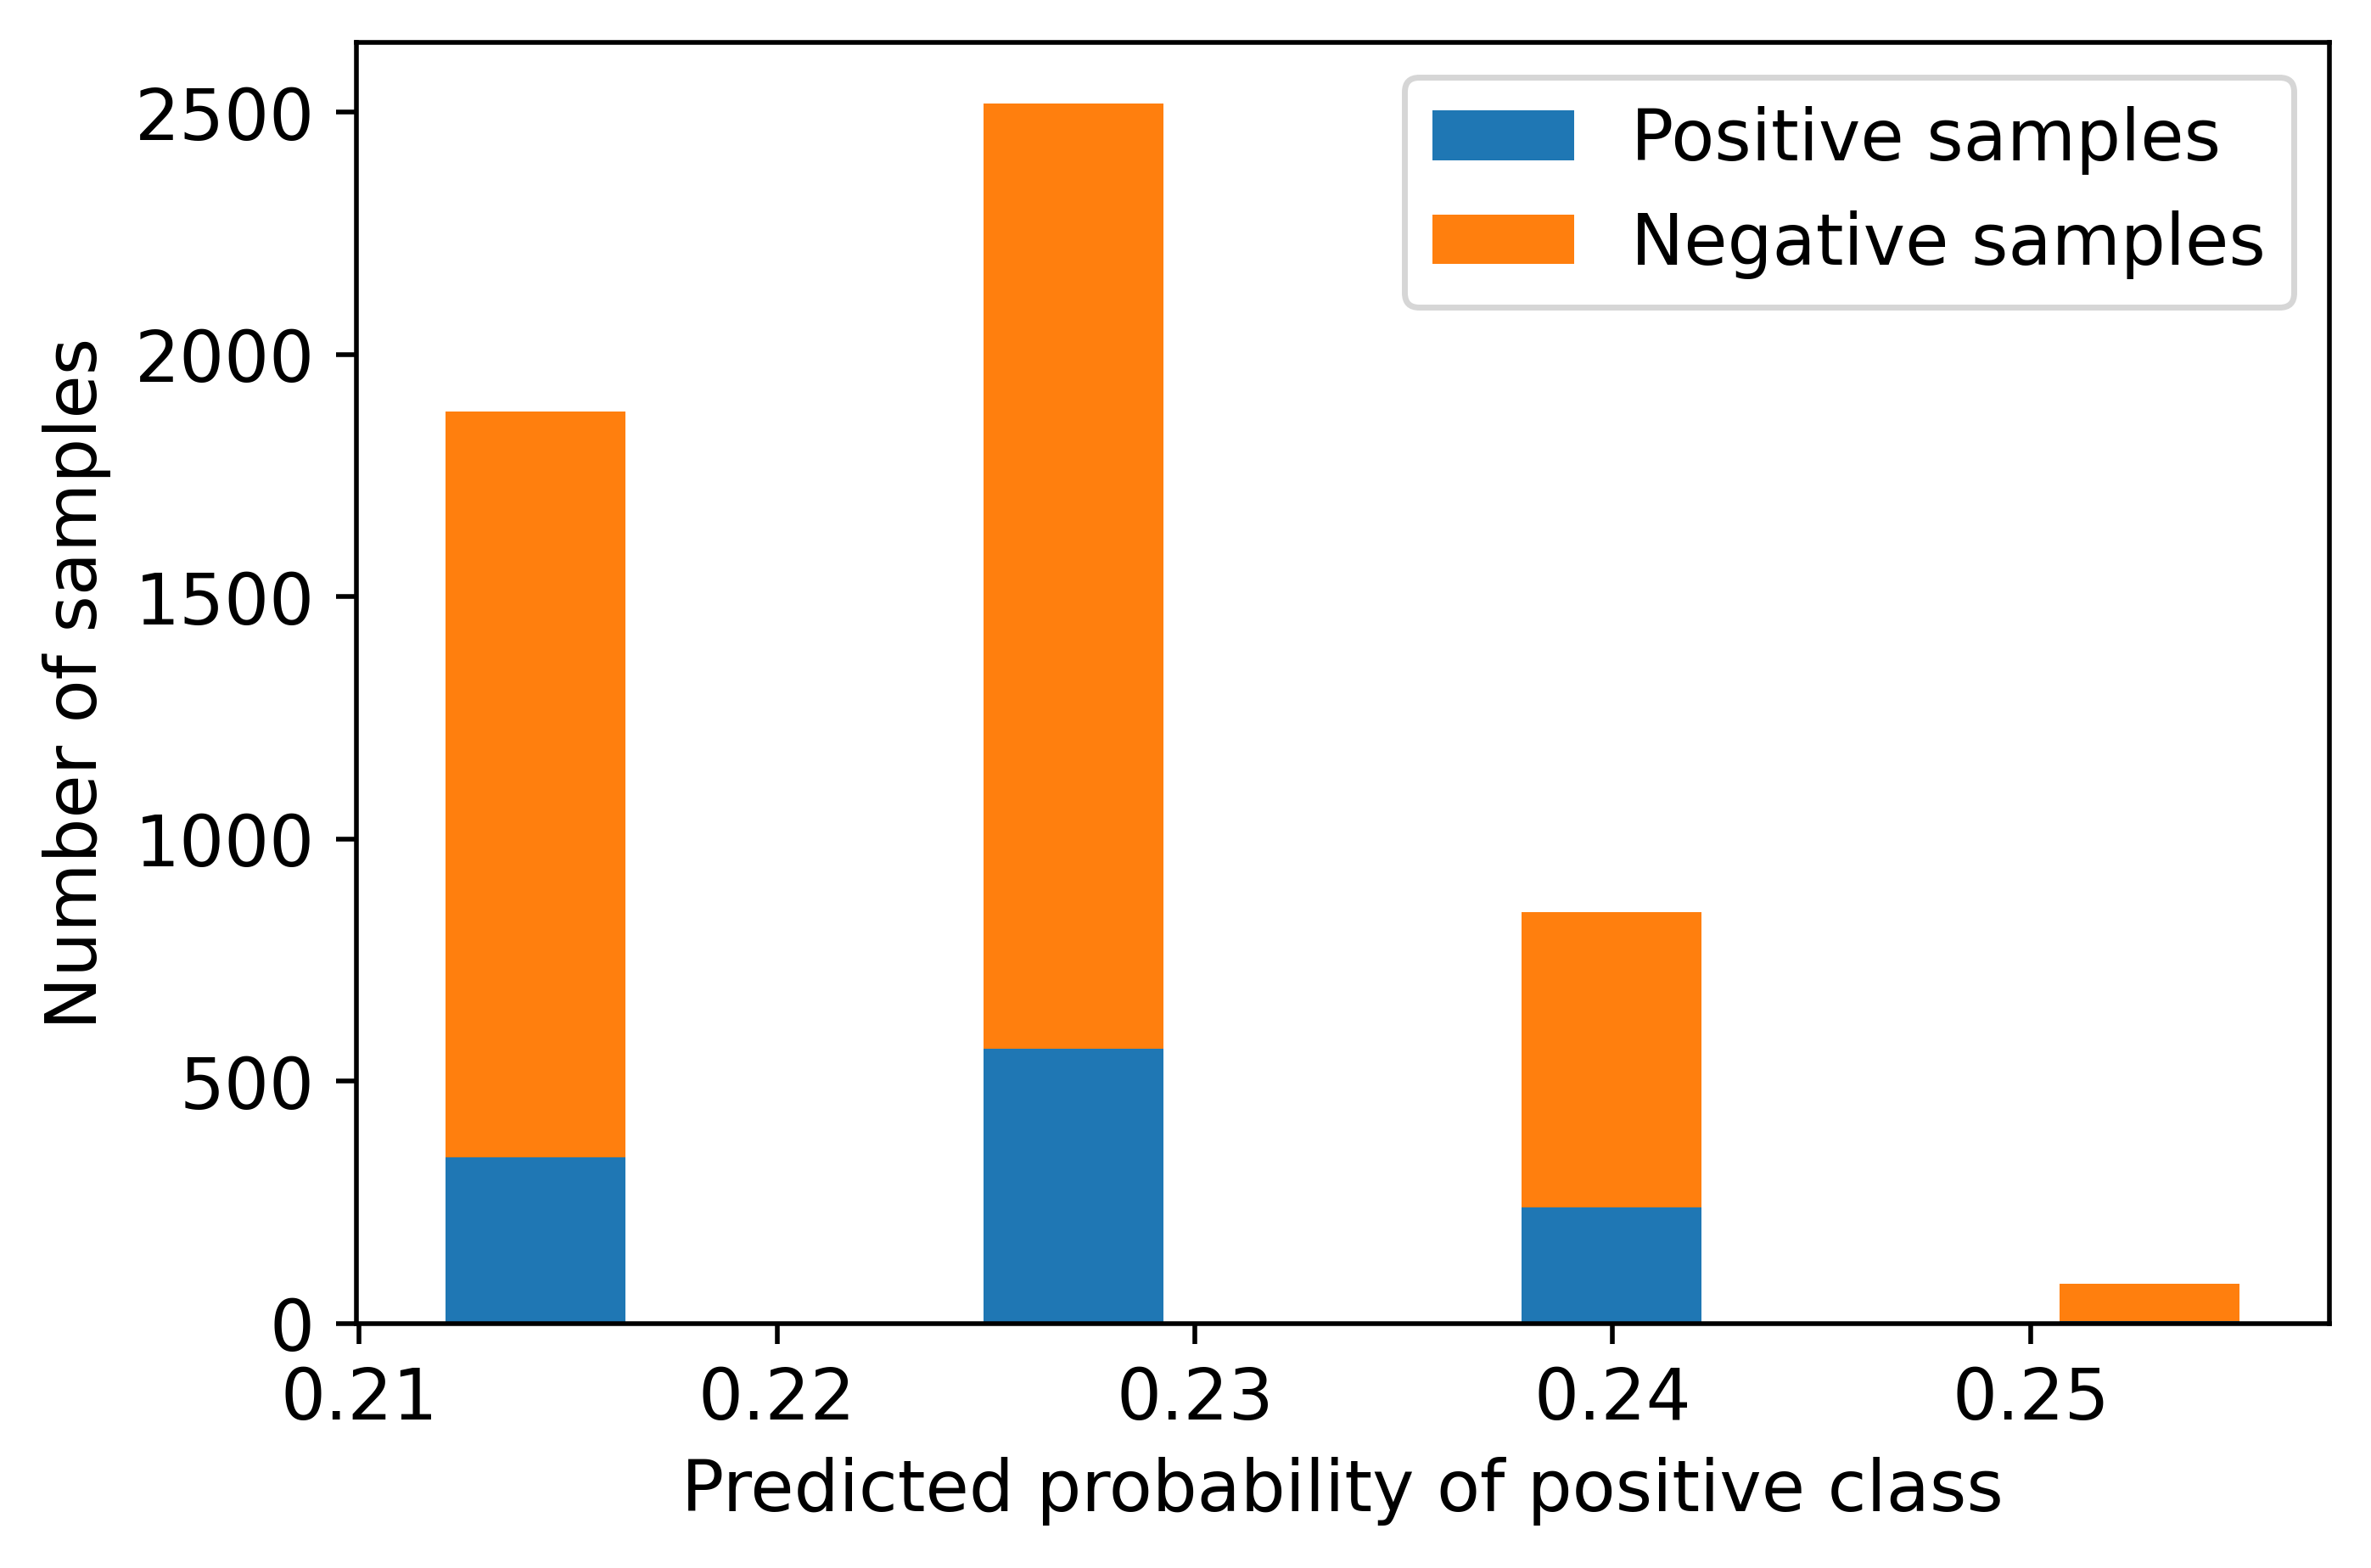

In [147]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

#### The Receiver Operating Characteristic (ROC) curve

In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

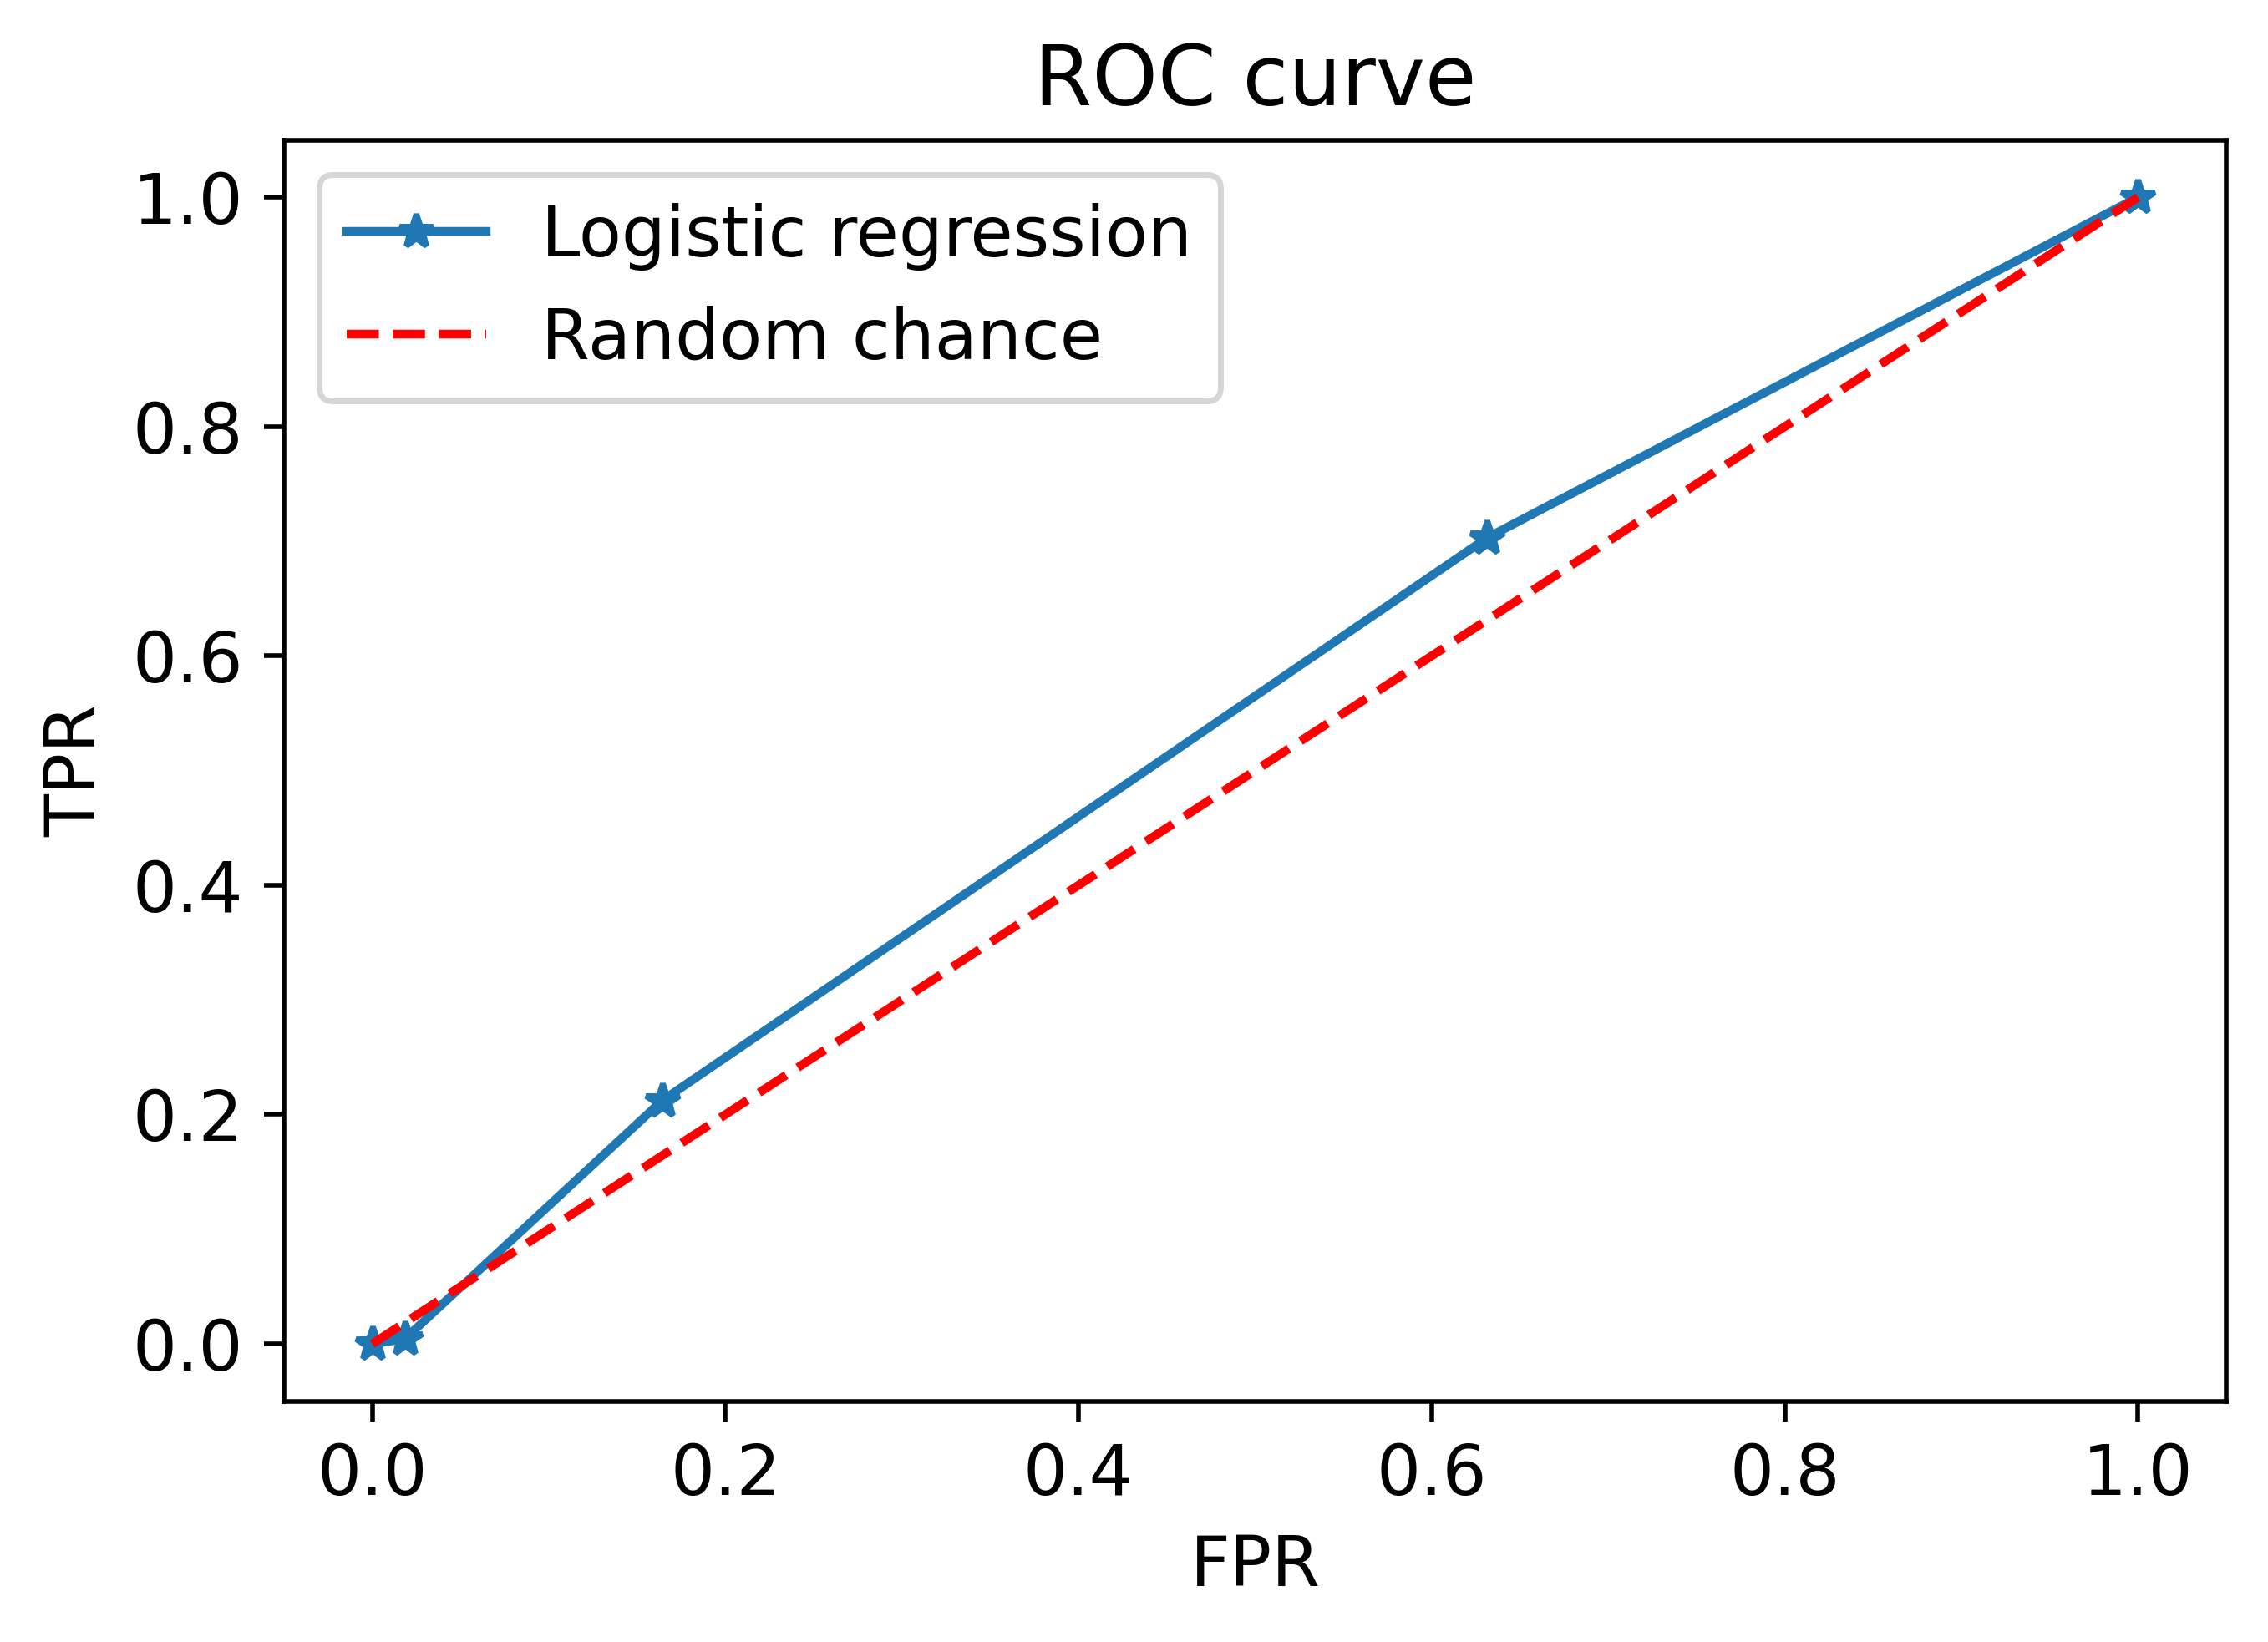

In [150]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [151]:
thresholds


array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [152]:
metrics.roc_auc_score(y_test, pos_proba)


0.5434650477972642

#### Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [153]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [154]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [155]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [156]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])


0.6201990844642832

In [157]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

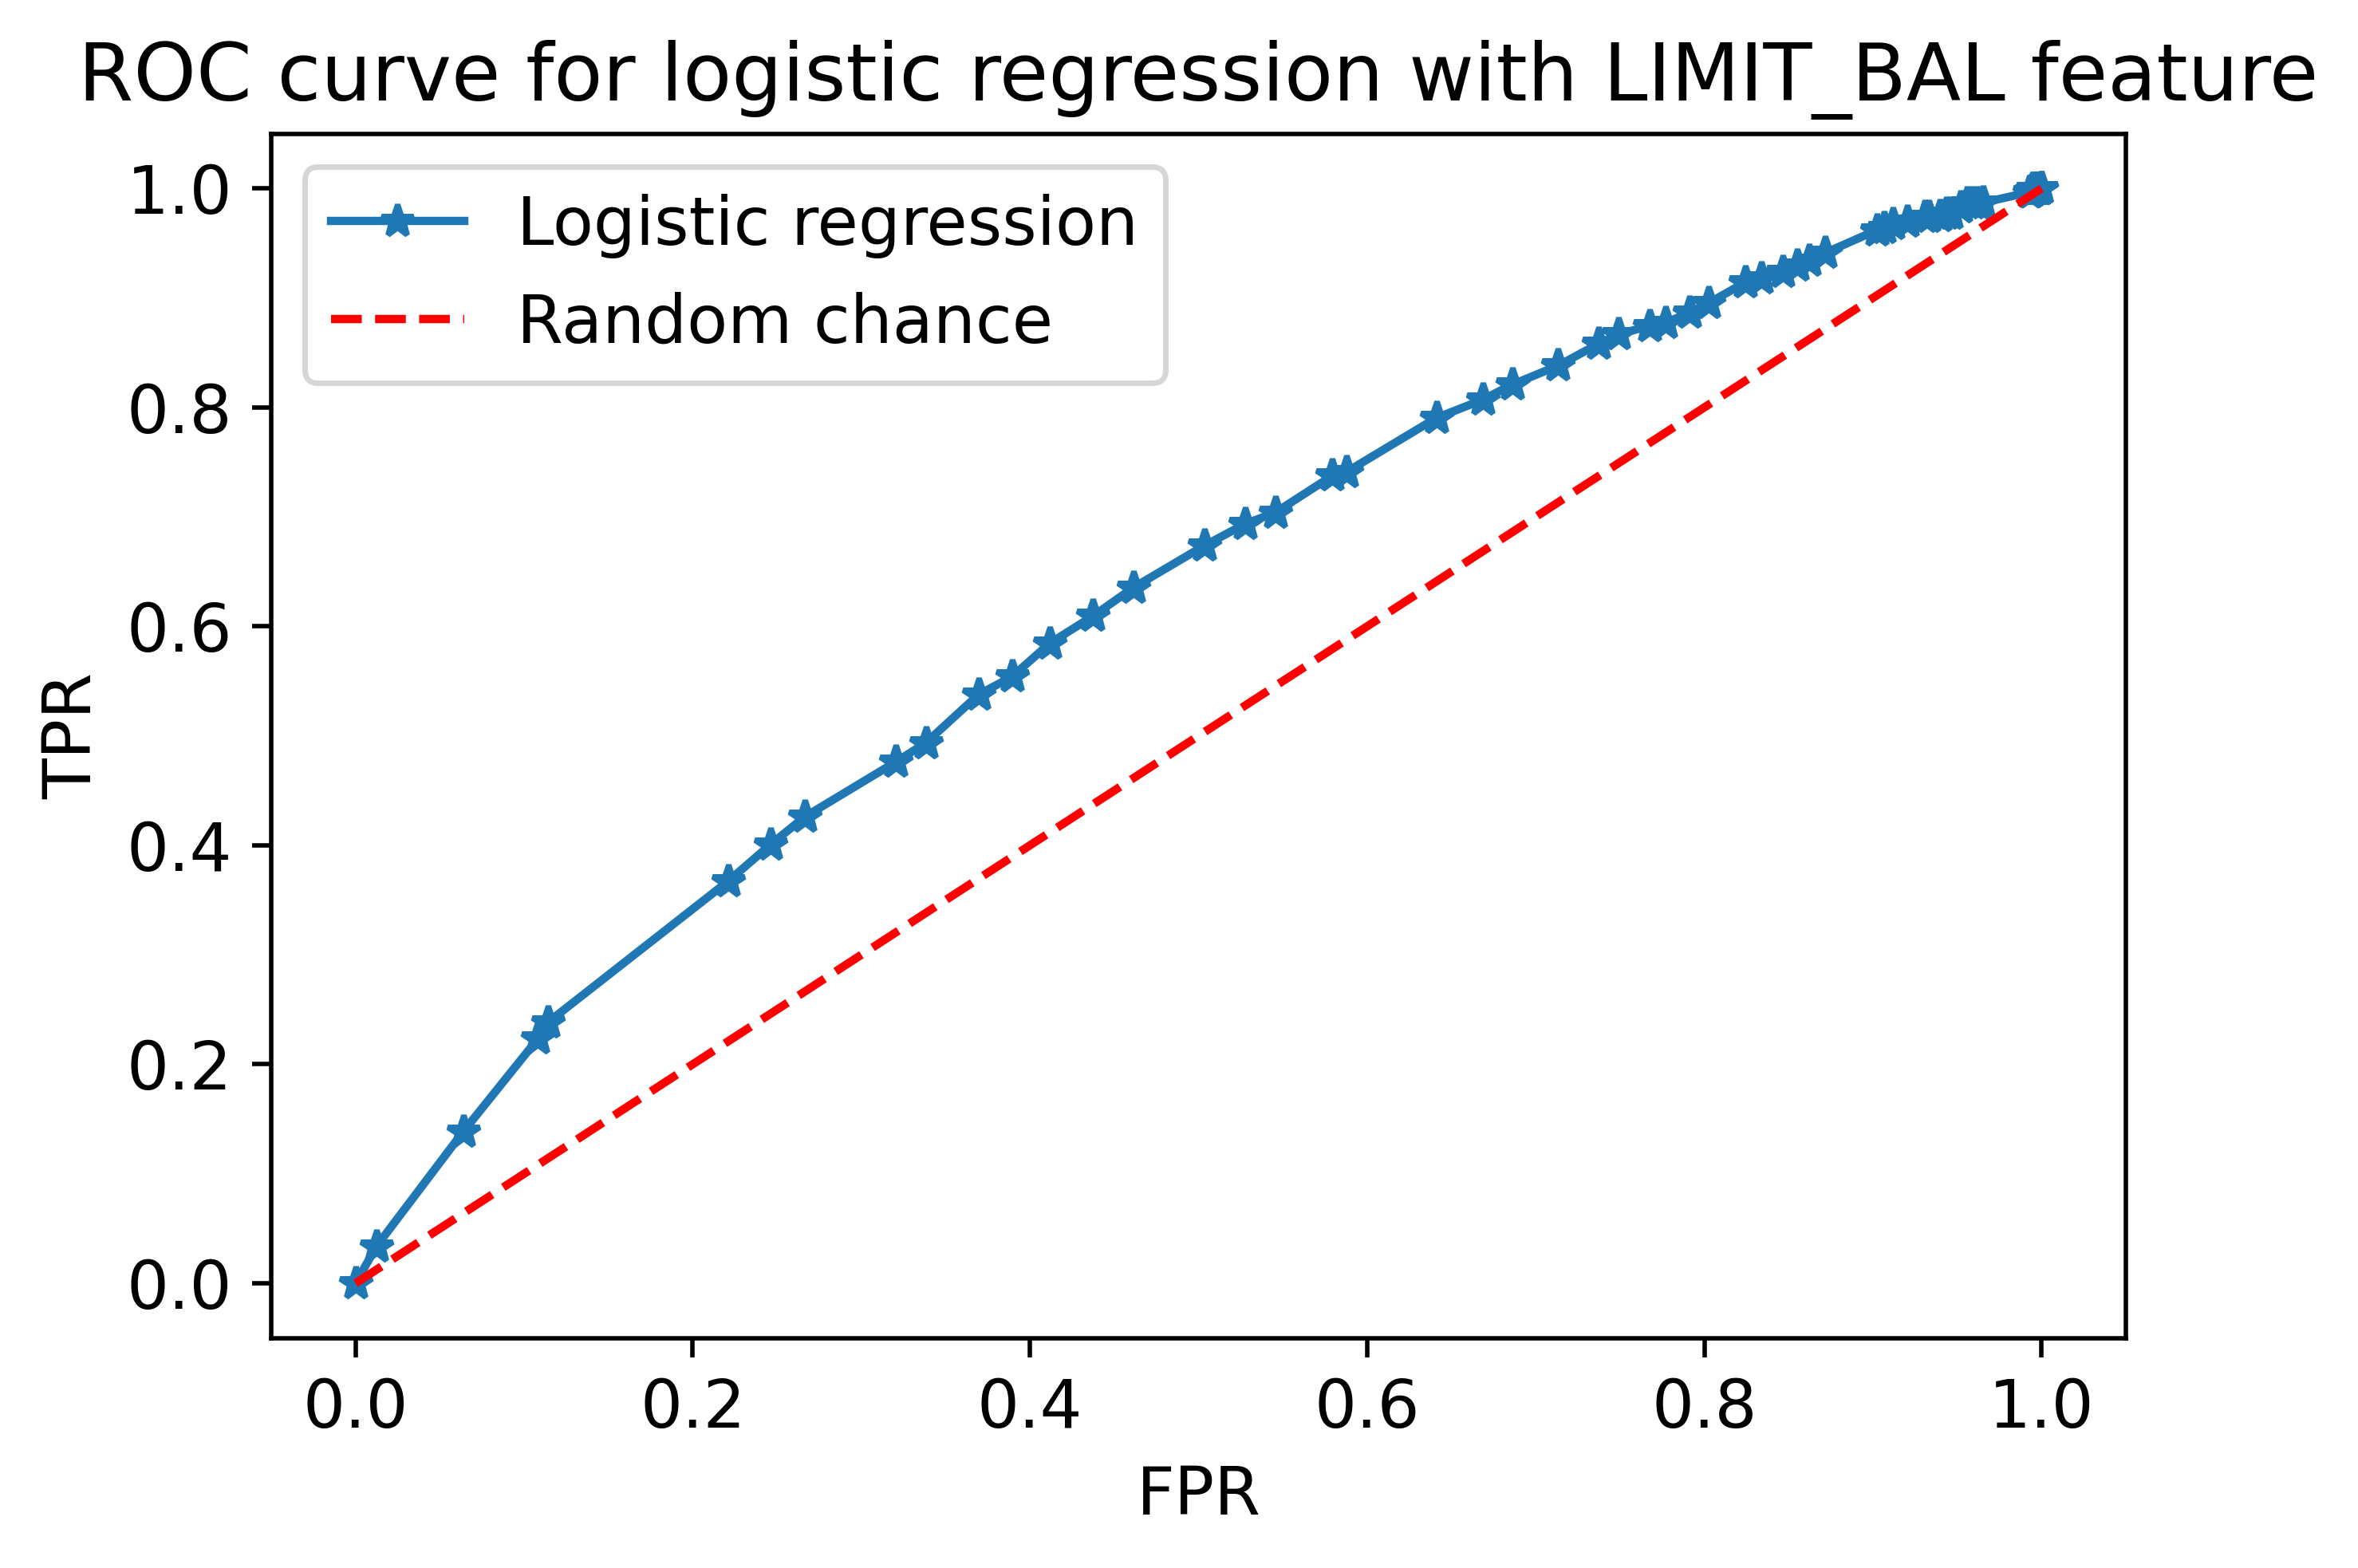

In [158]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [159]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

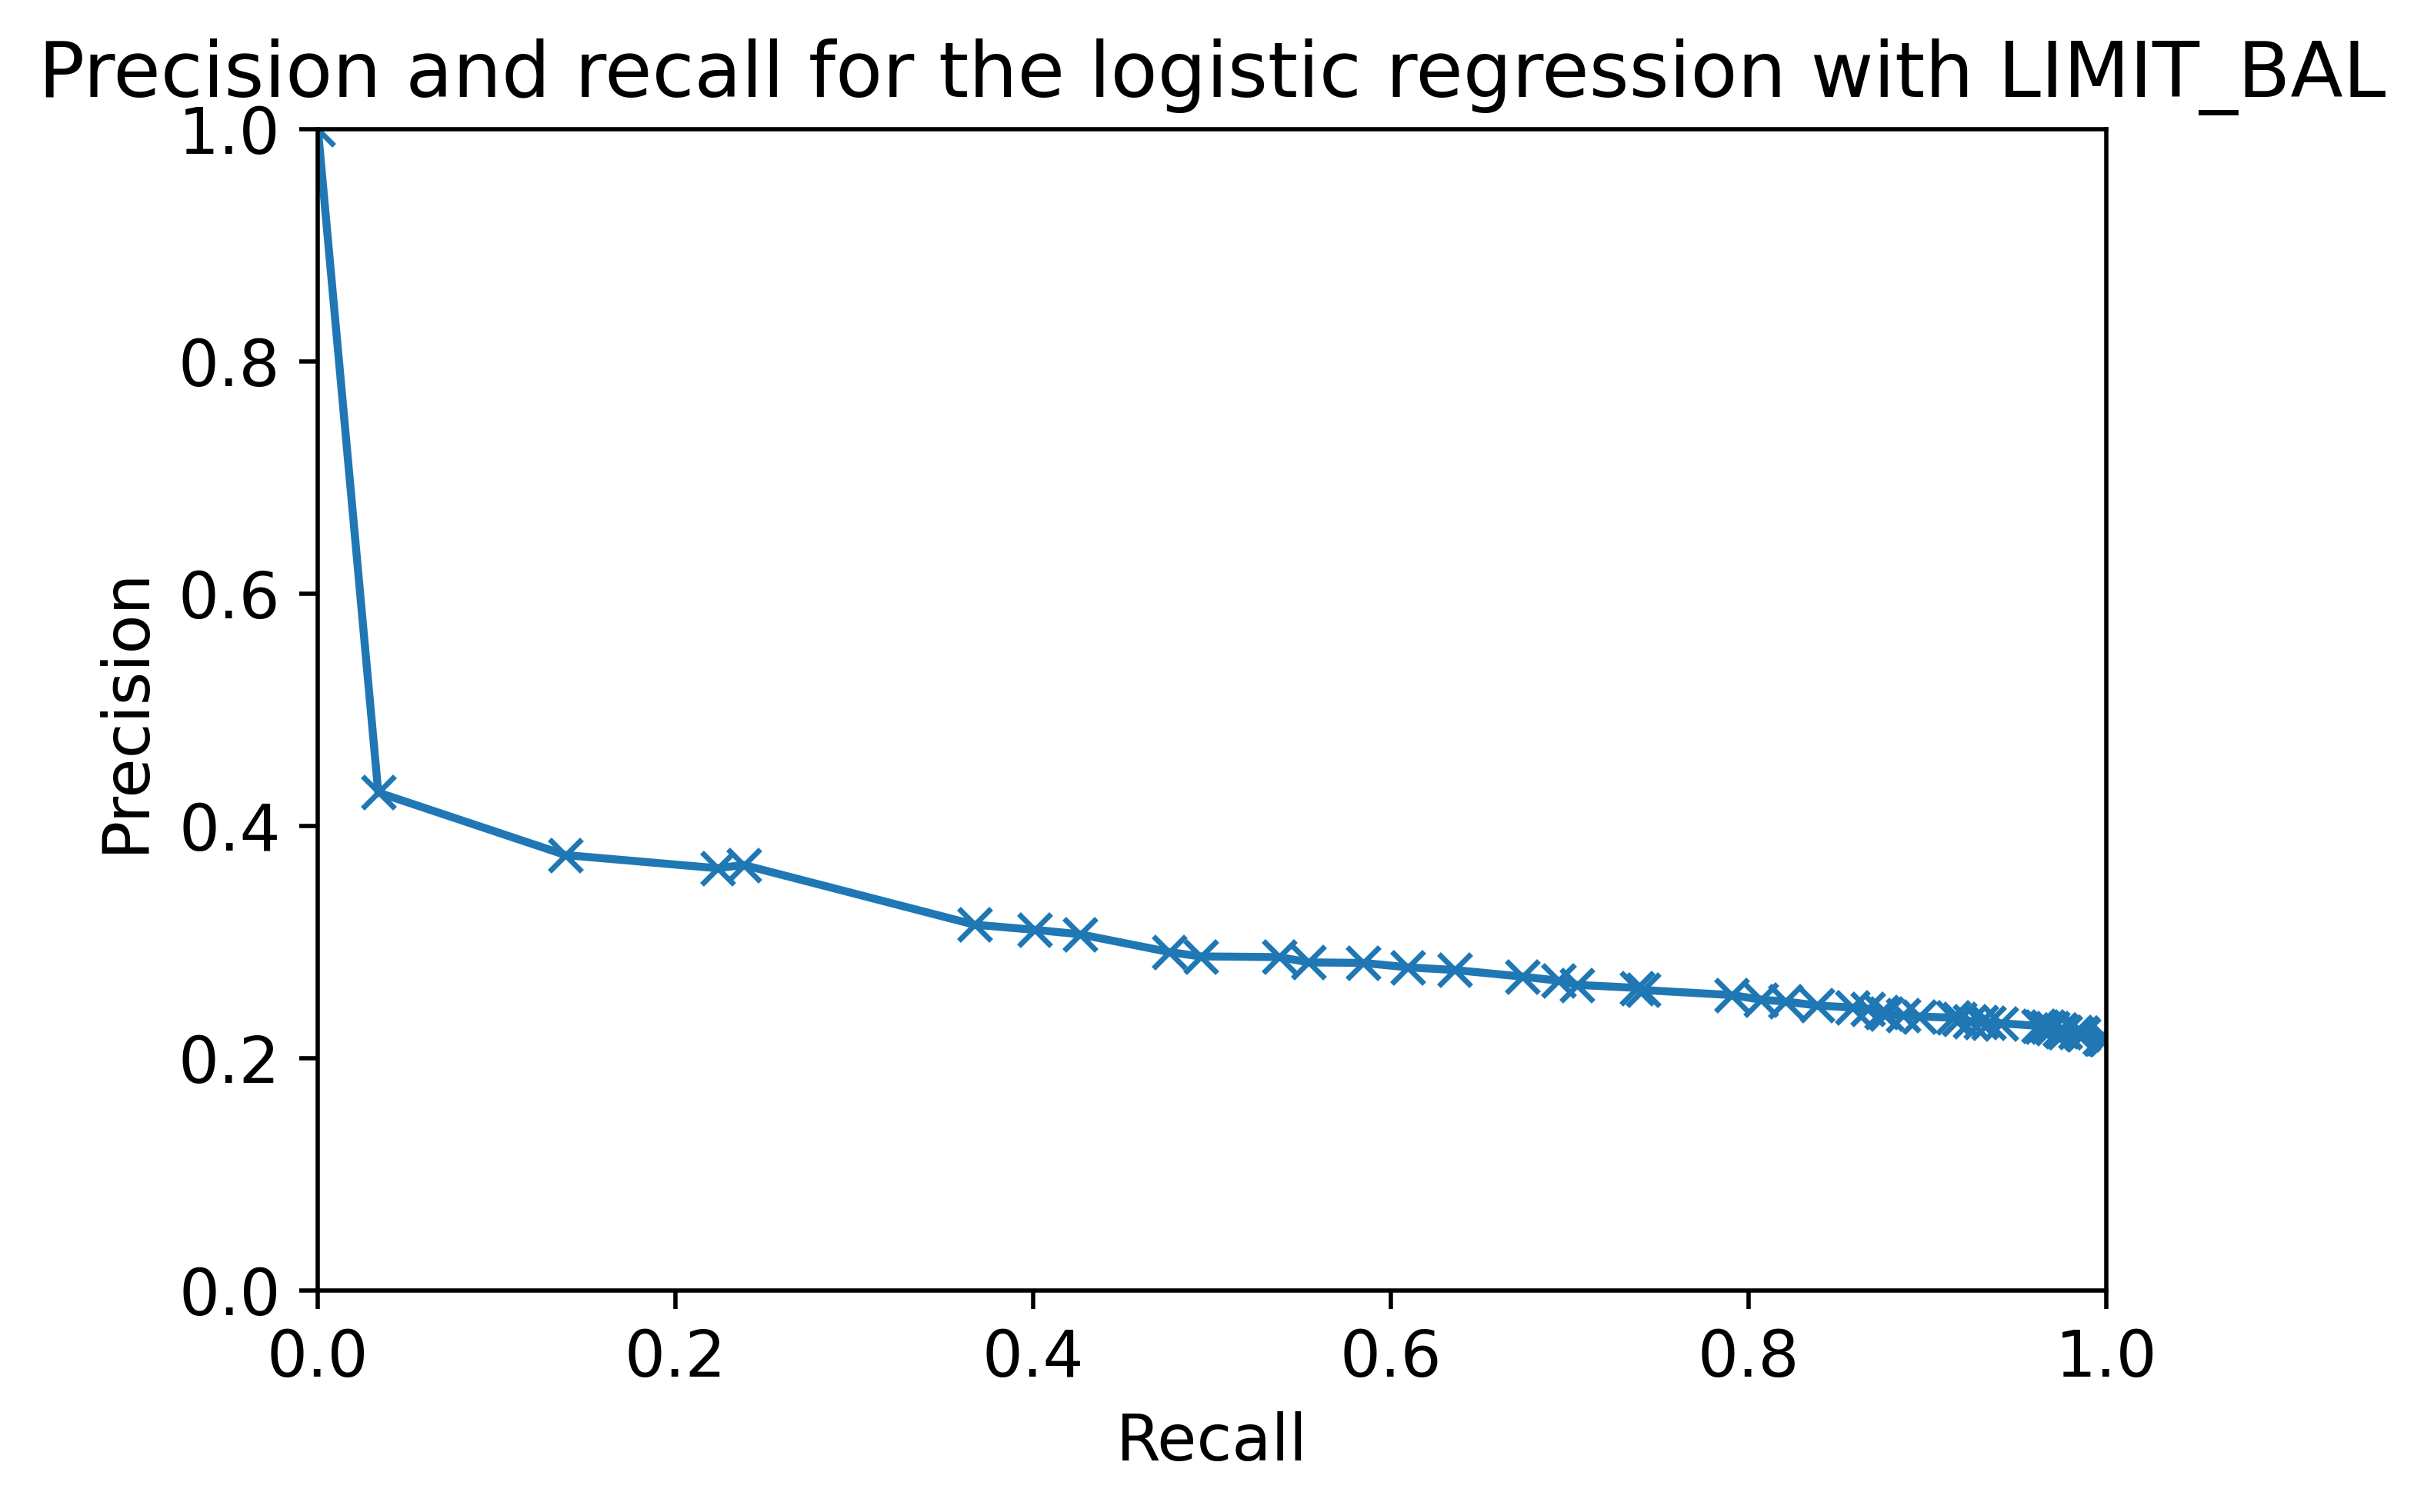

In [160]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [161]:
metrics.auc(recall, precision)

0.31566964427378624

In [162]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [163]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344